In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Reading the DataSet

In [13]:
def read_dataset():
    df=pd.read_csv('sonar.csv')
    X=df[df.columns[0:60]].values
    y=df[df.columns[60]]
    
    #Encode the dependent variable
    encoder=LabelEncoder()
    encoder.fit(y)
    y=encoder.transform(y)
    Y=one_hot_encode(y)
    print(X.shape)
    return(X,Y)

### Define the encoder function

In [5]:
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode

#### Read the dataset

In [14]:
X,Y=read_dataset()

(207, 60)


#### Shuffle the data set and mix up the rows

In [15]:
X,Y=shuffle(X,Y,random_state=1)

#### Split the dataset into train and test set

In [16]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.20,random_state=415)

In [17]:
#Inspect the shape of training and testing

In [18]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(165, 60)
(165, 2)
(42, 60)


#### Define the important parameters and variables to work with the tensors

In [35]:
learning_rate=0.3
training_epochs=1000
cost_history=[]
n_dim=X.shape[1]
print("n_dim",n_dim)
n_class=2
model_path="C:\\Users\\ayana\\Documents\\ML\\Machine Learning With Python"

n_dim 60


In [20]:
n_hidden_1=60
n_hidden_2=60
n_hidden_3=60
n_hidden_4=60

In [22]:
x=tf.placeholder(tf.float32,[None,n_dim])
W=tf.Variable(tf.zeros([n_dim,n_class]))
b=tf.Variable(tf.zeros([n_class]))
y_=tf.placeholder(tf.float32,[None,n_class])

#### Define the model

In [24]:
def multilayer_perceptron(x,weights,biases):
    # Hidden Layer with RELU activation
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1=tf.nn.sigmoid(layer_1)
    
    # Hidden layer with sigmoid activation
    
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.sigmoid(layer_2)
    
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3=tf.nn.sigmoid(layer_3)
    
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4=tf.nn.sigmoid(layer_3)
    
    #Output layer with Linear activation
    
    out_layer=tf.matmul(layer_4,weights['out'])+biases['out']
    return out_layer

#### Define the weights and biases for each layer of the model

In [25]:
weights={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_4,n_class]))
}
biases={
    'b1':tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2':tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3':tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4':tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_class]))
}

#### Initialize all the variables

In [26]:
init=tf.global_variables_initializer()
saver=tf.train.Saver()

#### Call the defined model

In [27]:
y=multilayer_perceptron(x,weights,biases)

#### Define the cost function and optimizer

In [28]:
cost_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))

In [29]:
training_step=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [30]:
sess=tf.Session()

In [31]:
sess.run(init)

#### Calculate the cost and accuracy for each epoch

In [49]:
mse_history=[]
accuracy_history=[]

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost=sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history=np.append(cost_history,cost)
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    #print accuracy
    
    pred_y=sess.run(y,feed_dict={x:test_x})
    mse=tf.reduce_mean(tf.square(pred_y-test_y))
    
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy=(sess.run(accuracy,feed_dict={x:train_x,y_:train_y}))
    accuracy_history.append(accuracy)
    
    print('epoch:',epoch,'-','cost:',cost,"-MSE:",mse_,"-Train Accuracy:",accuracy)
    
save_path=saver.save(sess,model_path)
print("Model saved in file: %s" % save_path)

epoch: 0 - cost: 0.341936 -MSE: 1.41430972986 -Train Accuracy: 0.848485
epoch: 1 - cost: 0.354019 -MSE: 1.35351788209 -Train Accuracy: 0.830303
epoch: 2 - cost: 0.340906 -MSE: 1.4150448925 -Train Accuracy: 0.848485
epoch: 3 - cost: 0.352882 -MSE: 1.35355734814 -Train Accuracy: 0.830303
epoch: 4 - cost: 0.339885 -MSE: 1.41581248522 -Train Accuracy: 0.848485
epoch: 5 - cost: 0.351757 -MSE: 1.35364598304 -Train Accuracy: 0.830303
epoch: 6 - cost: 0.338874 -MSE: 1.41661212236 -Train Accuracy: 0.848485
epoch: 7 - cost: 0.350643 -MSE: 1.3537842766 -Train Accuracy: 0.830303
epoch: 8 - cost: 0.337871 -MSE: 1.41744374951 -Train Accuracy: 0.848485
epoch: 9 - cost: 0.34954 -MSE: 1.35397033303 -Train Accuracy: 0.830303
epoch: 10 - cost: 0.336877 -MSE: 1.41830699028 -Train Accuracy: 0.848485
epoch: 11 - cost: 0.348448 -MSE: 1.35420444498 -Train Accuracy: 0.830303
epoch: 12 - cost: 0.335892 -MSE: 1.41920171399 -Train Accuracy: 0.848485
epoch: 13 - cost: 0.347366 -MSE: 1.35448530546 -Train Accuracy: 

epoch: 113 - cost: 0.302716 -MSE: 1.41224638921 -Train Accuracy: 0.836364
epoch: 114 - cost: 0.293873 -MSE: 1.49663504631 -Train Accuracy: 0.878788
epoch: 115 - cost: 0.301932 -MSE: 1.41396088651 -Train Accuracy: 0.836364
epoch: 116 - cost: 0.293143 -MSE: 1.49854911593 -Train Accuracy: 0.878788
epoch: 117 - cost: 0.301149 -MSE: 1.41568721904 -Train Accuracy: 0.836364
epoch: 118 - cost: 0.292416 -MSE: 1.50047048146 -Train Accuracy: 0.878788
epoch: 119 - cost: 0.300368 -MSE: 1.41742371122 -Train Accuracy: 0.836364
epoch: 120 - cost: 0.291689 -MSE: 1.5023985912 -Train Accuracy: 0.878788
epoch: 121 - cost: 0.299587 -MSE: 1.41917178565 -Train Accuracy: 0.836364
epoch: 122 - cost: 0.290964 -MSE: 1.50433329767 -Train Accuracy: 0.878788
epoch: 123 - cost: 0.298809 -MSE: 1.42092958998 -Train Accuracy: 0.836364
epoch: 124 - cost: 0.29024 -MSE: 1.50627367027 -Train Accuracy: 0.878788
epoch: 125 - cost: 0.298031 -MSE: 1.42269686451 -Train Accuracy: 0.836364
epoch: 126 - cost: 0.289517 -MSE: 1.5082

epoch: 225 - cost: 0.259007 -MSE: 1.51733262911 -Train Accuracy: 0.860606
epoch: 226 - cost: 0.253395 -MSE: 1.60766146374 -Train Accuracy: 0.890909
epoch: 227 - cost: 0.258209 -MSE: 1.5192906865 -Train Accuracy: 0.860606
epoch: 228 - cost: 0.252659 -MSE: 1.60964234661 -Train Accuracy: 0.89697
epoch: 229 - cost: 0.25741 -MSE: 1.52125137299 -Train Accuracy: 0.860606
epoch: 230 - cost: 0.251922 -MSE: 1.61162314828 -Train Accuracy: 0.90303
epoch: 231 - cost: 0.256611 -MSE: 1.52321519339 -Train Accuracy: 0.860606
epoch: 232 - cost: 0.251185 -MSE: 1.61360391267 -Train Accuracy: 0.90303
epoch: 233 - cost: 0.255811 -MSE: 1.52518161551 -Train Accuracy: 0.860606
epoch: 234 - cost: 0.250447 -MSE: 1.61558406171 -Train Accuracy: 0.90303
epoch: 235 - cost: 0.25501 -MSE: 1.5271511882 -Train Accuracy: 0.860606
epoch: 236 - cost: 0.249708 -MSE: 1.61756421359 -Train Accuracy: 0.90303
epoch: 237 - cost: 0.254209 -MSE: 1.52912390296 -Train Accuracy: 0.860606
epoch: 238 - cost: 0.248969 -MSE: 1.61954415065

epoch: 337 - cost: 0.21467 -MSE: 1.63672343511 -Train Accuracy: 0.909091
epoch: 338 - cost: 0.212235 -MSE: 1.72253124066 -Train Accuracy: 0.921212
epoch: 339 - cost: 0.213918 -MSE: 1.63917333774 -Train Accuracy: 0.909091
epoch: 340 - cost: 0.211528 -MSE: 1.72477398438 -Train Accuracy: 0.921212
epoch: 341 - cost: 0.213169 -MSE: 1.641639677 -Train Accuracy: 0.909091
epoch: 342 - cost: 0.210823 -MSE: 1.72702766083 -Train Accuracy: 0.921212
epoch: 343 - cost: 0.212423 -MSE: 1.64412268109 -Train Accuracy: 0.909091
epoch: 344 - cost: 0.210121 -MSE: 1.72929378642 -Train Accuracy: 0.921212
epoch: 345 - cost: 0.211679 -MSE: 1.6466233034 -Train Accuracy: 0.909091
epoch: 346 - cost: 0.20942 -MSE: 1.73157264053 -Train Accuracy: 0.921212
epoch: 347 - cost: 0.210938 -MSE: 1.64914074266 -Train Accuracy: 0.909091
epoch: 348 - cost: 0.208722 -MSE: 1.73386363409 -Train Accuracy: 0.921212
epoch: 349 - cost: 0.2102 -MSE: 1.6516760366 -Train Accuracy: 0.909091
epoch: 350 - cost: 0.208025 -MSE: 1.7361677190

epoch: 449 - cost: 0.177798 -MSE: 1.80387153883 -Train Accuracy: 0.933333
epoch: 450 - cost: 0.176986 -MSE: 1.87338205561 -Train Accuracy: 0.951515
epoch: 451 - cost: 0.177246 -MSE: 1.8074455431 -Train Accuracy: 0.933333
epoch: 452 - cost: 0.176449 -MSE: 1.87665214252 -Train Accuracy: 0.951515
epoch: 453 - cost: 0.176698 -MSE: 1.81104014353 -Train Accuracy: 0.933333
epoch: 454 - cost: 0.175916 -MSE: 1.87994520711 -Train Accuracy: 0.951515
epoch: 455 - cost: 0.176154 -MSE: 1.81465496524 -Train Accuracy: 0.933333
epoch: 456 - cost: 0.175386 -MSE: 1.88326042357 -Train Accuracy: 0.951515
epoch: 457 - cost: 0.175613 -MSE: 1.818288983 -Train Accuracy: 0.933333
epoch: 458 - cost: 0.174858 -MSE: 1.88659901912 -Train Accuracy: 0.951515
epoch: 459 - cost: 0.175076 -MSE: 1.82194267002 -Train Accuracy: 0.933333
epoch: 460 - cost: 0.174335 -MSE: 1.88996039684 -Train Accuracy: 0.951515
epoch: 461 - cost: 0.174542 -MSE: 1.82561649528 -Train Accuracy: 0.933333
epoch: 462 - cost: 0.173814 -MSE: 1.89334

epoch: 561 - cost: 0.151888 -MSE: 2.03073817552 -Train Accuracy: 0.945455
epoch: 562 - cost: 0.151498 -MSE: 2.09149917308 -Train Accuracy: 0.963636
epoch: 563 - cost: 0.151506 -MSE: 2.03519716816 -Train Accuracy: 0.945455
epoch: 564 - cost: 0.151118 -MSE: 2.09602015291 -Train Accuracy: 0.963636
epoch: 565 - cost: 0.151126 -MSE: 2.03966734349 -Train Accuracy: 0.945455
epoch: 566 - cost: 0.150741 -MSE: 2.10056255466 -Train Accuracy: 0.963636
epoch: 567 - cost: 0.150749 -MSE: 2.04414862557 -Train Accuracy: 0.945455
epoch: 568 - cost: 0.150366 -MSE: 2.10512511937 -Train Accuracy: 0.963636
epoch: 569 - cost: 0.150374 -MSE: 2.04864153154 -Train Accuracy: 0.945455
epoch: 570 - cost: 0.149994 -MSE: 2.10970761431 -Train Accuracy: 0.963636
epoch: 571 - cost: 0.150002 -MSE: 2.05314464537 -Train Accuracy: 0.945455
epoch: 572 - cost: 0.149624 -MSE: 2.11431156451 -Train Accuracy: 0.963636
epoch: 573 - cost: 0.149632 -MSE: 2.05765903927 -Train Accuracy: 0.945455
epoch: 574 - cost: 0.149256 -MSE: 2.11

epoch: 673 - cost: 0.133728 -MSE: 2.29401838586 -Train Accuracy: 0.945455
epoch: 674 - cost: 0.133337 -MSE: 2.37018844462 -Train Accuracy: 0.981818
epoch: 675 - cost: 0.133418 -MSE: 2.29884357217 -Train Accuracy: 0.945455
epoch: 676 - cost: 0.133025 -MSE: 2.37527787376 -Train Accuracy: 0.981818
epoch: 677 - cost: 0.133105 -MSE: 2.30366267427 -Train Accuracy: 0.945455
epoch: 678 - cost: 0.132709 -MSE: 2.38033839392 -Train Accuracy: 0.981818
epoch: 679 - cost: 0.132786 -MSE: 2.30847483249 -Train Accuracy: 0.945455
epoch: 680 - cost: 0.132388 -MSE: 2.38536666974 -Train Accuracy: 0.981818
epoch: 681 - cost: 0.132463 -MSE: 2.31327818103 -Train Accuracy: 0.945455
epoch: 682 - cost: 0.132061 -MSE: 2.39035964702 -Train Accuracy: 0.981818
epoch: 683 - cost: 0.132133 -MSE: 2.31807135583 -Train Accuracy: 0.945455
epoch: 684 - cost: 0.13173 -MSE: 2.39531221444 -Train Accuracy: 0.981818
epoch: 685 - cost: 0.131798 -MSE: 2.32285539669 -Train Accuracy: 0.945455
epoch: 686 - cost: 0.131392 -MSE: 2.400

epoch: 785 - cost: 0.108798 -MSE: 2.56313280942 -Train Accuracy: 0.975758
epoch: 786 - cost: 0.108609 -MSE: 2.59126006643 -Train Accuracy: 0.981818
epoch: 787 - cost: 0.108433 -MSE: 2.56835166178 -Train Accuracy: 0.975758
epoch: 788 - cost: 0.108248 -MSE: 2.59544510772 -Train Accuracy: 0.981818
epoch: 789 - cost: 0.108074 -MSE: 2.57357384754 -Train Accuracy: 0.975758
epoch: 790 - cost: 0.107891 -MSE: 2.59966688528 -Train Accuracy: 0.981818
epoch: 791 - cost: 0.107719 -MSE: 2.57879735728 -Train Accuracy: 0.981818
epoch: 792 - cost: 0.10754 -MSE: 2.60392326176 -Train Accuracy: 0.981818
epoch: 793 - cost: 0.107369 -MSE: 2.58402191514 -Train Accuracy: 0.981818
epoch: 794 - cost: 0.107193 -MSE: 2.6082139524 -Train Accuracy: 0.981818
epoch: 795 - cost: 0.107024 -MSE: 2.58924624566 -Train Accuracy: 0.981818
epoch: 796 - cost: 0.10685 -MSE: 2.61253614916 -Train Accuracy: 0.981818
epoch: 797 - cost: 0.106683 -MSE: 2.59446981499 -Train Accuracy: 0.981818
epoch: 798 - cost: 0.106511 -MSE: 2.61688

epoch: 896 - cost: 0.0922274 -MSE: 2.84907776501 -Train Accuracy: 0.987879
epoch: 897 - cost: 0.092094 -MSE: 2.85037330097 -Train Accuracy: 0.987879
epoch: 898 - cost: 0.0919608 -MSE: 2.85400727736 -Train Accuracy: 0.987879
epoch: 899 - cost: 0.0918277 -MSE: 2.8553937022 -Train Accuracy: 0.987879
epoch: 900 - cost: 0.0916947 -MSE: 2.85893998938 -Train Accuracy: 0.987879
epoch: 901 - cost: 0.091562 -MSE: 2.86041127546 -Train Accuracy: 0.987879
epoch: 902 - cost: 0.0914294 -MSE: 2.86387546363 -Train Accuracy: 0.987879
epoch: 903 - cost: 0.091297 -MSE: 2.86542733918 -Train Accuracy: 0.987879
epoch: 904 - cost: 0.0911648 -MSE: 2.86881432569 -Train Accuracy: 0.987879
epoch: 905 - cost: 0.0910327 -MSE: 2.87044157247 -Train Accuracy: 0.987879
epoch: 906 - cost: 0.0909008 -MSE: 2.873755332 -Train Accuracy: 0.987879
epoch: 907 - cost: 0.0907691 -MSE: 2.8754532234 -Train Accuracy: 0.987879
epoch: 908 - cost: 0.0906375 -MSE: 2.8786998768 -Train Accuracy: 0.987879
epoch: 909 - cost: 0.0905061 -MSE

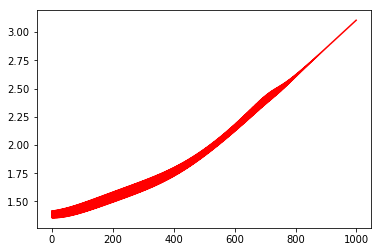

In [50]:
#Plot mse and accuracy graph
plt.plot(mse_history,'r')
plt.show()

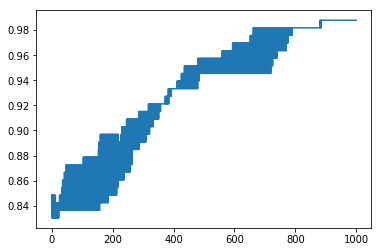

In [51]:
plt.plot(accuracy_history)
plt.show()

#### print the final accuracy

In [52]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy:",(sess.run(accuracy,feed_dict={x:test_x,y_:test_y})))

Test Accuracy: 0.904762


### print the final mean square error

In [53]:
pred_y=sess.run(y,feed_dict={x:test_x})
mse=tf.reduce_mean(tf.square(pred_y-test_y))
print("MSE:%.4f" % sess.run(mse))

MSE:3.1048


In [54]:
prediction=tf.argmax(y,1)
correct_prediction=tf.equal(prediction,tf.argmax(y_,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

#### print accuracy run

In [60]:
print('******************************')
print("0 stands for M i.e. Mine and 1 stands for R i.e. Rock")
print('******************************')

for i in range(93,101):
    
    prediction_run = sess.run(prediction, feed_dict={x:X[i].reshape(1,60)})
    accuracy_run = sess.run(accuracy, feed_dict={x:X[i].reshape(1,60), y_:Y[i].reshape(1,2)})
    print(i,"Original Class: ", int(sess.run(y_[i][1],feed_dict={y_:Y})), " Predicted Values: ", prediction_run[0] )
    print("Accuracy: ",str(accuracy_run*100)+"%")

******************************
0 stands for M i.e. Mine and 1 stands for R i.e. Rock
******************************
93 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
94 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
95 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
96 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
97 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
98 Original Class:  1  Predicted Values:  1
Accuracy:  100.0%
99 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
100 Original Class:  0  Predicted Values:  0
Accuracy:  100.0%
